In [1]:
from evaluation import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

/home/fe/hufe/miniconda3/envs/remote-sensing/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to /home/fe/hufe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/fe/hufe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
%cd ..

/home/fe/hufe/Documents/semester11/activelearning_ic


In [3]:
reference_paths = [f"evaluation/test_references_{i}.txt" for i in range(5)]

In [4]:
with open(f"evaluation/test_images.txt", "r") as f:
    images = f.read().split("\n")[:-1]
classes = [image.split('/')[2] for image in images]

In [6]:
bleus = []
meteors = []
rouges = []
percentage = []

references = load_references(reference_paths)
hypothesis = load_hypothesis('evaluation/', 'full_model_on_testset.txt')

meteor_results = []
bleu_results = []
rouge_results = []

for hypo, reference in zip(hypothesis, references):    
    hypo = hypo.replace('.', '') 
    reference =  [ref.replace('.', '') for ref in reference] 
    bl = bleu(reference, hypo)
    me = meteor(reference, hypo)
    ro = rouge(reference, hypo)

    bleu_results.append(bl)
    meteor_results.append(me)
    rouge_results.append(ro)

/home/fe/hufe/miniconda3/envs/remote-sensing/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/fe/hufe/miniconda3/envs/remote-sensing/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/fe/hufe/miniconda3/envs/remote-sensing/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of l

In [7]:
dense = pd.DataFrame({'bleu': bleu_results, 'meteor': meteor_results, 'rouge': rouge_results, 'class': classes})
sparse = pd.DataFrame({'value': bleu_results + meteor_results + rouge_results, 'method': ['bleu']*len(bleu_results) + ['meteor']*len(meteor_results) + ['rouge']*len(rouge_results), 'class': classes*3})

## Get mean values of each metric

In [8]:
dense.mean()

/tmp/ipykernel_43951/728873984.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dense.mean()


bleu      0.551159
meteor    0.760916
rouge     0.738423
dtype: float64

/home/fe/hufe/miniconda3/envs/remote-sensing/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


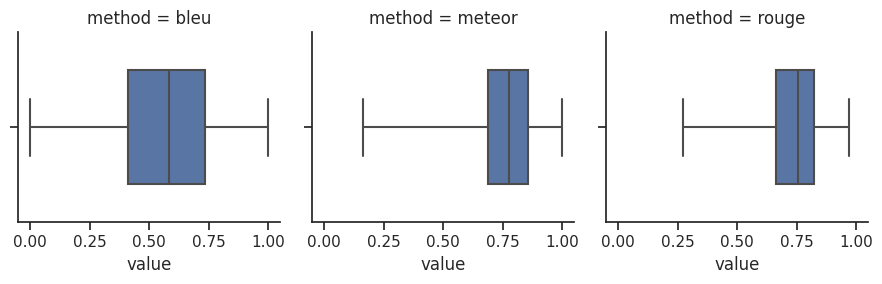

In [9]:
sns.set_theme(style="ticks")

g = sns.FacetGrid(sparse, col="method")
g.map(sns.boxplot,"value", whis=[0, 100], width=.6,)

<Axes: title={'center': 'Meteor'}, xlabel='meteor', ylabel='class'>

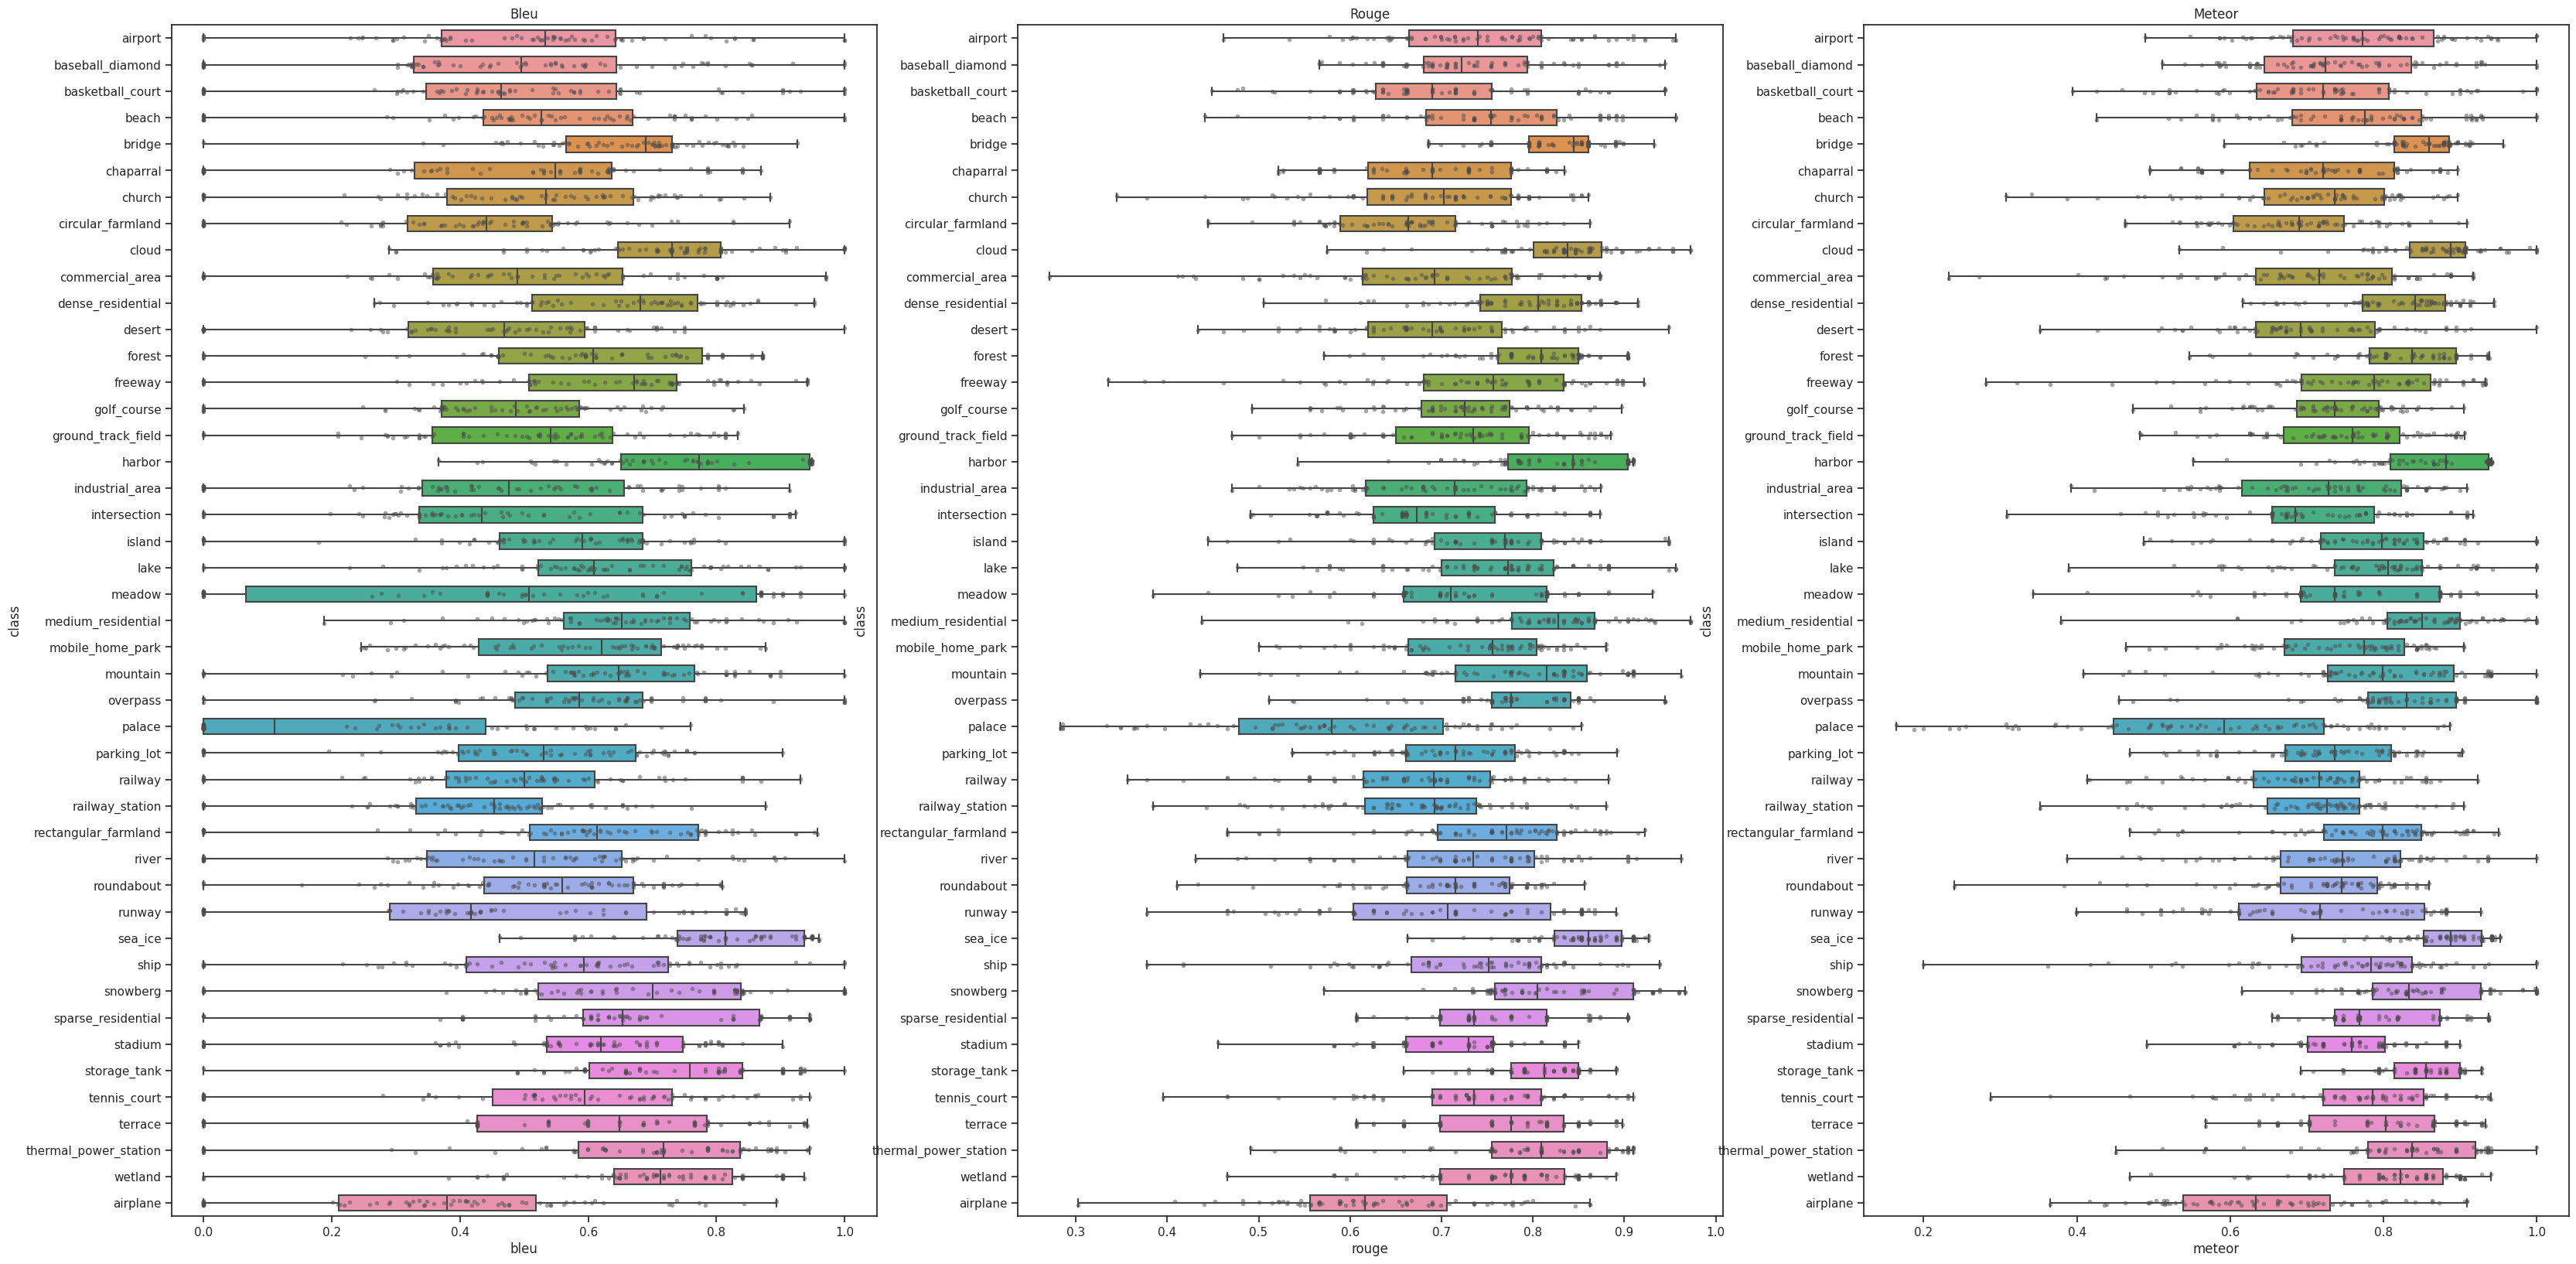

In [10]:
sns.set_theme(style="ticks")

plt.figure(figsize=(40,20))
plt.subplot(1,3,1, title='Bleu')
sns.boxplot(x="bleu", y="class", data=dense, whis=[0, 100], width=.6)
sns.stripplot(x="bleu", y="class", data=dense, size=4, color=".3", linewidth=0, alpha=0.5)

plt.subplot(1,3,2, title='Rouge')
sns.boxplot(x="rouge", y="class", data=dense, whis=[0, 100], width=.6,)
sns.stripplot(x="rouge", y="class", data=dense, size=4, color=".3", linewidth=0, alpha=0.5)


plt.subplot(1,3,3, title='Meteor')
sns.boxplot(x="meteor", y="class", data=dense, whis=[0, 100], width=.6,)
sns.stripplot(x="meteor", y="class", data=dense, size=4, color=".3", linewidth=0, alpha=0.5)

In [11]:
order = dense.groupby('class').mean().sort_values('meteor', ascending=False).index

<Axes: title={'center': 'Meteor'}, xlabel='class', ylabel='meteor'>

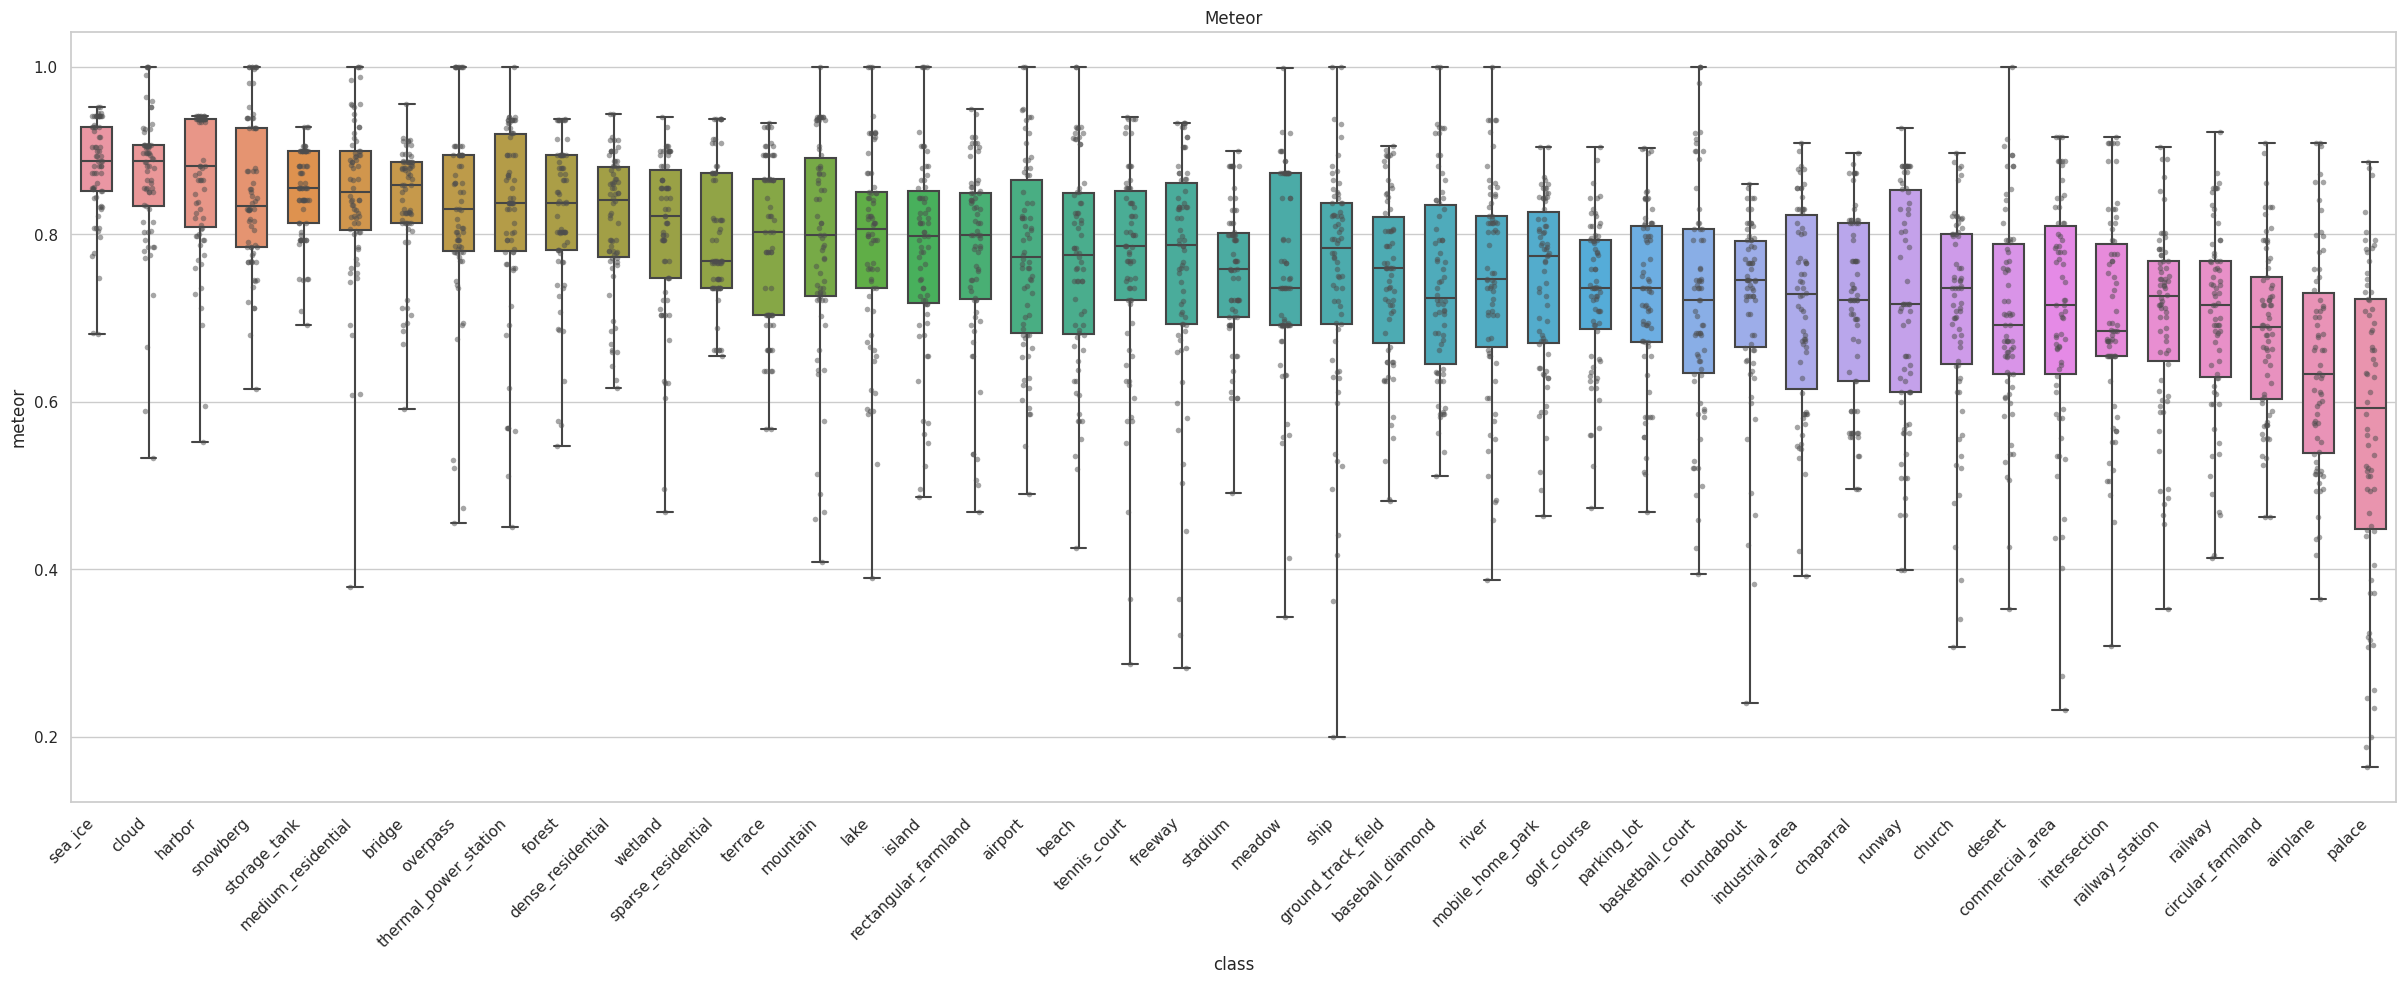

In [12]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(30,10))
plt.title('Meteor')
plt.xticks(rotation=45, ha='right')

sns.boxplot(y="meteor", x="class", data=dense, whis=[0, 100], width=.6, order=order)
sns.stripplot(y="meteor", x="class", data=dense, size=4, color=".3", linewidth=0, alpha=0.5, order=order)

<Axes: title={'center': 'Meteor'}, xlabel='meteor', ylabel='Count'>

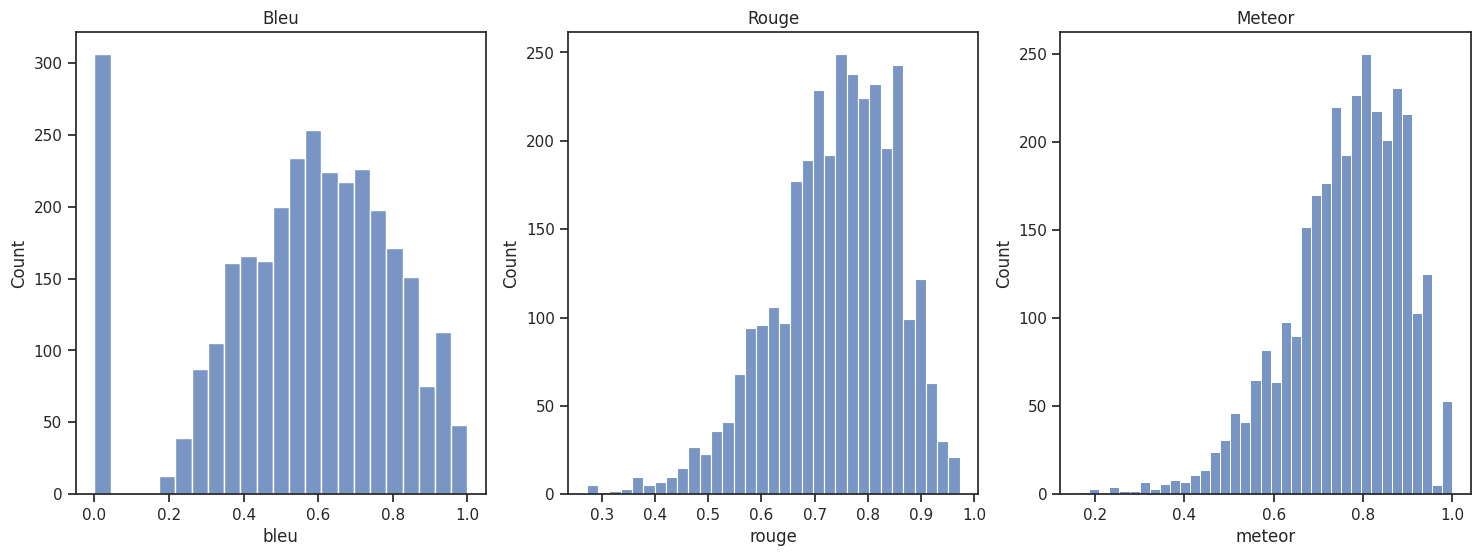

In [13]:
sns.set_theme(style="ticks")
plt.figure(figsize=(18,6))

plt.subplot(1,3,1, title='Bleu')
sns.histplot(data=dense, x='bleu')

plt.subplot(1,3,2, title='Rouge')
sns.histplot(data=dense, x='rouge')

plt.subplot(1,3,3, title='Meteor')
sns.histplot(data=dense, x='meteor')

In [1]:
dense.hist(column='rouge', by='class', bins=10, figsize=(40, 20))
# sns.histplot(data=dense, x='rouge', hue='class', multiple='stack', bins=10)

NameError: name 'dense' is not defined